---
title: "Roots II"
subtitle: "Minimization"
format: 
  html:
    toc: true
    code-fold: false
    page-layout: full
    fig-cap-location: bottom
    number-sections: true
    number-depth: 2
    html-to-math: katex
    html-math-method: katex
    callout-appearance: minimal
jupyter: python3
---

# Minimization
In this lecture, instead of finding function zeros, we are now going to be locating function minima. Note that we will be studying the problem of unconstrained minimization, meaning that we will not be imposing any further constraints on our variables; we are simply looking for the variable values that minimize a scalar function. 

## One-Dimensional Minimization
For simplicity, let's start from the case of a function of a single variable, $\phi(x)$. As you may recall from elementary calculus, a _stationary point_ (which, for a differentiable function, is also known as a _critical point_) is a point at which the derivative vanishes, namely
$$
\phi'(x^*) = 0
$$
where we are now using $x^*$ to denote the stationary point. If $\phi''(x^∗) > 0$d we are dealing with a _local minimum_, whereas if $\phi''(x^*)$< 0 a _local maximum_. Minima and maxima together are known as _extrema_.

A simple example is our function $\phi(x) = e^{x - \sqrt{x}} - x$. In the previous section we see that it has two zeros at $\simeq 1$ and $\simeq 2.5$. We are interested in its minimum, which is located at $x^* \simeq 1.8$, as can be seen in @fig-function. 

![The function $f(x) = e^{x - \sqrt{x}} - x$](week10_files/function.png){#fig-function}

It is easy to see that $\phi''(x^*)>0$ so that is a (single) minimum. To find out this minimum, we can in principle apply the root finding method you learned last time on the function $f(x) = \phi'(x)$. 

##  Multidimensional Minimization
The problem of multidimensional minimization is, in general, much harder to solve; as the dimensionality grows one cannot even visualize what's going on very effectively. We start with some mathematical aspects of the problem, then turn to a two-dimensional example, and after that discuss specific minimization methods.

### General Features
Consider a scalar function of many variables, i.e., $\phi(\boldsymbol{x})$, where $\boldsymbol{x}$ bundles together the variables $x_0, x_1,\dots, x_{n−1}$ but $\phi$ produces scalar values. We will now employ a multidimensional Taylor expansion.  Also, in order to keep things general, we will not expand around our latest iterate, $\boldsymbol{x}^{(k−1)}$, since we are not introducing a specific method right now; we are simply trying to explore features of the problem of minimizing $\phi(x)$.

We assume $\phi(\boldsymbol{x})$ has bounded first, second, and third derivatives. Then 
$$
\phi(\boldsymbol{x} + \boldsymbol{q}) = \phi(\boldsymbol{x}) + 
(\nabla\phi(\boldsymbol{x}))^T\boldsymbol{q}
+ \frac{1}{2}\boldsymbol{q}^T\boldsymbol{H}(\boldsymbol{x})\boldsymbol{q}
+ O(\|\boldsymbol{q} \|^3).
$$

Here, the first-order term involves $\nabla\phi(\boldsymbol{x})$, the _gradient_ vector of $\phi$ at $\boldsymbol{x}$. This is 
$$
\nabla \phi(\boldsymbol{x}) = \left(\frac{\partial\phi}{\partial x_0} \quad 
\frac{\partial\phi}{\partial x_1} \quad \dots \quad \frac{\partial\phi}{\partial x_{n-1}} \right)^T.
$$
The first order term is simply
$$
(\nabla\phi(\boldsymbol{x}))^T\boldsymbol{q}  = 
\sum_{j=0}^{n-1} \frac{\partial \phi}{\partial x_j} q_j = \nabla\phi(\boldsymbol{x})\cdot \boldsymbol{q}.
$$

Note that $\nabla \phi(\boldsymbol{x})$ is the direction of _steepest ascent_, to which we will come back later. 
To see this, we have for small $\boldsymbol{q}$ the term linear in $\boldsymbol{q}$ is the dominant contribution since $\|\boldsymbol{q} \|^2 \ll \| \boldsymbol{q} \|$. If we choose $\boldsymbol{q}$ to be aligned with $\nabla \phi(\boldsymbol{x})$, then the dot product $\nabla\phi(\boldsymbol{x})\cdot \boldsymbol{q}$ will be maximized.

Assuming $\boldsymbol{x}^∗$ is a local minimum of $\phi$ and ignoring higher-order terms we have
$$
\phi(\boldsymbol{x}* + \boldsymbol{q}) \simeq \phi(\boldsymbol{x}^*) 
+ \nabla\phi(\boldsymbol{x^*})\cdot \boldsymbol{q}.
$$
On the other hand, if we choose $\boldsymbol{q}$ to be aligned in the direction of $-\nabla\phi(\boldsymbol{x})$, then $\nabla\phi(\boldsymbol{x})\cdot \boldsymbol{q}<0$ whenever $\nabla\phi(\boldsymbol{x})\neq 0$. This then means $\phi(\boldsymbol{x}* + \boldsymbol{q}) < \phi(\boldsymbol{x}^*)$, in contradiction to the fact $\phi(x^*)$ is a local minimum. Because of this, we must have
$$
\nabla \phi(\boldsymbol{x^*}) = \boldsymbol{0}
$$
at local minima (in general extrema or critical points). 

Having established that the gradient vector vanishes at a critical point, we now turn to the second-order term in the Taylor expansion, which involves the _Hessian matrix_, $\boldsymbol{H}(\boldsymbol{x})$. To see what this is, we expand the quadratic form as follows
$$
\frac{1}{2}\boldsymbol{q}^T \boldsymbol{H}(\boldsymbol{x})\boldsymbol{q}
=\frac{1}{2} \sum_{i,j = 0}^{n-1} \frac{\partial^2\phi}{\partial x_i\partial x_j} q_i q_j.
$$
This means the matrix element
$$
H_{ij}(\boldsymbol{x}) \equiv (\boldsymbol{H}(\boldsymbol{x}))_{ij}
=\frac{\partial^2\phi}{\partial x_i\partial x_j}.
$$

Since the lowest order in Taylor expansion is the second order, we have
$$
\phi(\boldsymbol{x}* + \boldsymbol{q}) \simeq \phi(\boldsymbol{x}^*) 
+ \frac{1}{2}\boldsymbol{q}^T \boldsymbol{H}(\boldsymbol{x}^*)\boldsymbol{q}
+ O(\|\boldsymbol{q} \|^3).
$$

If we now further assume that $\boldsymbol{H}(\boldsymbol{x}^∗)$ is _positive definite_ (meaning $\boldsymbol{v}^T \boldsymbol{H}\boldsymbol{v}>0$, $\forall \boldsymbol{v} \neq \boldsymbol{0}$), then we can see that, indeed, $\phi(\boldsymbol{x}^* + \boldsymbol{q}) > \phi(\boldsymbol{x}^*)$, as it should, since $\boldsymbol{x}^*$ is a minimum.

To summarize:

i. a necessary condition for $x^∗$ being a local minimum is that it be
a critical point, i.e., that its gradient vector vanish, and 

ii. a sufficient condition for the critical point $x^∗$ being a local minimum is that its Hessian matrix be positive definite.

### A Two-Dimensional Example
Let us consider
$$
\phi(x_0, x_1) = x_0^2 − 2x_0 + x_1^4 - 2x_1^2 + x_1.
$$
This function is shown in @fig-two-variable.

![Example of a scalar function of two variables](week10_files/two_variable.png){#fig-two-variable}

This is attempting both to visualize the third dimension and to draw equipotential curves (also known as contour lines).

We find that we are dealing with two local minima. The one on the "right" leads to smaller/more negative function values, so it appears to be the global minimum.
If you place a marble somewhere near these two well, it will roll down to one of the minima; which of the two minima you end up in depends on where you start. 

## Gradient Descent
We now turn to a simple and intuitively clear approach to multidimensional minimization. This method, known as gradient descent, does not exhibit great convergence properties and can get in trouble for non-differentiable functions. Even so, it is a pedagogical, straightforward approach.

### Algorithm and Interpretation
Recall that $\nabla\phi(\boldsymbol{\boldsymbol{x}})$ is in the direction of steepest ascent. This leads to the conclusion that $-\nabla\phi(\boldsymbol{x})$ is the direction of steepest descent.  We know that choosing $\boldsymbol{q}$ to point along the negative gradient guarantees that the function value decrease will be the fastest. The method we are about to introduce, which employs $-\nabla \phi(\boldsymbol{x})$, is known as _gradient descent_. 

Qualitatively, this approach makes use of local information: if you're exploring a mountainous region (with your eyes closed), you can take a small step downhill at that point; this doesn't mean that you're always actually moving in the direction that will most quickly bring you to a (possibly distant) local minimum, simply that you are moving in a downward direction. 

Implicit in our discussion above is the fact that the steps we make will be _small_: while $-\nabla \phi(\boldsymbol{x})$ helps you pick the direction, it doesn't tell you how far in that direction you should go, i.e., how large a $\|\boldsymbol{q} \|$ you should employ. The simplest possible choice, analogously to our closed-eyes example, is to make small fixed steps, quantified by a parameter $\gamma$. This leads to the following prescription:
$$
\boldsymbol{x}^{(k)} = \boldsymbol{x}^{(k-1)} -\gamma \nabla \phi(\boldsymbol{x}^{(k-1)}).
$$
At each step, this method picks the direction that is perpendicular to the contour line, as illustrated in @fig-gradient-descent.

![Illustrate of gradient descent](week10_files/Gradient_Descent.png){#fig-gradient-descent}


In practice, we may not know the gradient analytically, and we typically approximate it using a forward-difference scheme. In equation form, this means that
$$
\nabla\phi(\boldsymbol{x}) = \begin{pmatrix}
[\phi(\boldsymbol{x} + \boldsymbol{e}_0 h) - \phi(\boldsymbol{x})]/h\\
[\phi(\boldsymbol{x} + \boldsymbol{e}_1 h) - \phi(\boldsymbol{x})]/h\\
\cdots \\
[\phi(\boldsymbol{x} + \boldsymbol{e}_{n-1} h) - \phi(\boldsymbol{x})]/h\\
\end{pmatrix} 
$$
for a given spacing h. This involves "only" $n+1$ function evaluations.

### Implementation
Note that in the function `gradient()`, we used `xs*np.ones((n,n)).T`. The meaning of this expression can be understood in the following way.

- Let's say `xs=np.array([x0,x1])`
- Then `xs*np.ones((2,2)) = np.array([[x0,x1],[x0,x1]])`
- Thus,`(xs*np.ones((2,2))).T = np.array([[x0,x0],[x1,x1]])`

Then, `Xph = (xs*np.ones((n,n))).T + np.identity(n)*h = np.array([[x0+h,x0],[x1,x1+h]])`.

When `Xph` is inserted into `phi()`, we have `x0,x1 = Xph` which leads to `x0 = np.array([x0+h,x0])`, `x1 = np.array([x1,x1+h])`. Then the function `phi(Xph)` returns a vector
$$
\begin{pmatrix}
\phi(\boldsymbol{x}+\boldsymbol{e}_0 h) \\
\phi(\boldsymbol{x}+\boldsymbol{e}_1 h) .
\end{pmatrix}
$$

In [2]:
import numpy as np

def phi(xs):
    x0, x1 = xs
    return x0**2 - 2*x0 + x1**4 - 2*x1**2 + x1

def gradient(phi,xs,h=1.e-6):
    n = xs.size
    phi0 = phi(xs)
    Xph = (xs*np.ones((n,n))).T + np.identity(n)*h
    grad = (phi(Xph) - phi0)/h
    return grad

def descent(phi,gradient,xolds,gamma=0.15,kmax=200,tol=1.e-8):
    for k in range(1,kmax):
        xnews = xolds - gamma*gradient(phi,xolds)

        err = termcrit(xolds,xnews)
        print(k, xnews, err, phi(xnews))
        if err < tol:
            break

        xolds = np.copy(xnews)
    else:
        xnews = None
    return xnews

def termcrit(xolds,xnews):
    errs = np.abs((xnews - xolds)/xnews)
    return np.sum(errs)
    
if __name__ == '__main__':
    xolds = np.array([2.,0.25])
    xnews = descent(phi, gradient, xolds)
    print(xnews)

1 [1.69999985 0.24062524] 0.21543067857184484 -0.38182351336797915
2 [1.48999974 0.22664124] 0.20264073065897387 -0.6333530209502826
3 [1.34299967 0.20564122] 0.21157625945177916 -0.7594983275463574
4 [1.24009962 0.17380848] 0.2661256195506861 -0.8280498618293368
5 [1.16806958 0.12494345] 0.45276305522029103 -0.8777871985954815
6 [1.11764856 0.04873952] 1.608607274900684 -0.9421647380026318
7 [ 1.08235384 -0.07208595] 1.7087398591446958 -1.0756695552415236
8 [ 1.05764754 -0.26511247] 0.7514526354432409 -1.3974185387806914
9 [ 1.04035313 -0.56299971] 0.5457308766418241 -2.0948395460096236
10 [ 1.02824704 -0.94372756] 0.41520335042339795 -2.9309660540915905
11 [ 1.01977278 -1.15566205] 0.19169789499758141 -3.0426740826911614
12 [ 1.01384079 -1.0729902 ] 0.08289908836262229 -3.0499045321707055
13 [ 1.00968841 -1.12557975] 0.05083473301209256 -3.054234380060766
14 [ 1.00678173 -1.09531014] 0.03052274820652257 -3.05538233943229
15 [ 1.00474706 -1.11406803] 0.018862352410894102 -3.0558933421

##  Newton's Method
Gradient descent is nice and simple but, as we will see in the problem set, either your $\gamma$ is very small and you waste iterations or you are carrying out a line-search at each step to determine the optimal $γ^{(k)}$, which is starting to get costly. 

A distinct approach goes as follows: instead of using only the value of the gradient at a given point, perhaps we should be building in more information. 
Specifically, we have that gradient vanishes at a critical point
$$
\nabla\phi(\boldsymbol{x}^*) = \boldsymbol{0}.
$$

Combine that with the fact that the gradient of a scalar function is a column vector, and you can recast that equation as a set of $n$ coupled nonlinear equations
$$
\boldsymbol{f}(\boldsymbol{x}) = \nabla\phi(\boldsymbol) = \boldsymbol{0}.
$$

In other words, finding a critical point is simply a special case of solving a nonlinear system of equations. We shall apply the Newton's method in the following to find out the critical point. 

### Map to a finding roots of multiple nonlinear equations
We assume that $\boldsymbol{f}$ has bounded first and second derivatives; the actual solution of our problem $\boldsymbol{f}(\boldsymbol{x})=\boldsymbol{0}$ is $\boldsymbol{x}^∗$ and we will be trying to approximate it using iterates, which this time are themselves vectors, $\boldsymbol{x}^{(k)}$.
In order to make the transition to the general problem as simple as possible, let's start from a Taylor expansion of a single function component $f_i$ around our latest iterate $\boldsymbol{x}^{(k-1)}$:
$$
f_i(\boldsymbol{x}) = f_i(\boldsymbol{x}^{(k-1)}) + (\nabla f_i(\boldsymbol{x}^{(k-1)}))^T(\boldsymbol{x} - \boldsymbol{x}^{(k-1)}) 
+ O(\|\boldsymbol{x} - \boldsymbol{x}^{(k-1)} \|^2),
$$
where $i = 0, 1, \dots, n-1$ is the index for each component of $\boldsymbol{f}$. We can rewrite the second term on the right-hand side in terms of vector components
$$
(\nabla f_i(\boldsymbol{x}^{(k-1)}))^T(\boldsymbol{x} - \boldsymbol{x}^{(k-1)})
=
\sum_{j=0}^{n-1}\left. \frac{\partial f_i}{\partial x_i}\right|_{x_j^{(k-1)}}(x_j - x_j^{(k-1)}).
$$

With a view to collecting the n function components together, we now introduce the _Jacobian matrix_:
$$
\boldsymbol{J}(\boldsymbol{x}) = \left\{\frac{\partial f_i}{\partial x_j} \right\} 
= \begin{pmatrix}
\frac{\partial f_0}{\partial x_0} &\frac{\partial f_0}{\partial x_1} &\cdots &\frac{\partial f_0}{\partial x_{n-1}} \\
\frac{\partial f_1}{\partial x_0} &\frac{\partial f_1}{\partial x_1} &\cdots &\frac{\partial f_1}{\partial x_{n-1}} \\
\vdots &\vdots & \ddots & \vdots \\
\frac{\partial f_{n-1}}{\partial x_0} &\frac{\partial f_{n-1}}{\partial x_1} &\cdots &\frac{\partial f_{n-1}}{\partial x_{n-1}}
\end{pmatrix}.
$$

We can thus write
$$
\boldsymbol{f}(\boldsymbol{x}) = \boldsymbol{f}(\boldsymbol{x}^{(k-1)}) + \boldsymbol{J}(\boldsymbol{x}^{(k-1)})(\boldsymbol{x} - \boldsymbol{x}^{(k-1)})
+ O(\|\boldsymbol{x} - \boldsymbol{x}^{(k-1)} \|^2).
$$

The solution correspoding to $\boldsymbol{f}(\boldsymbol{x}^*)=\boldsymbol{0}$ satisfies
$$
\boldsymbol{0} = \boldsymbol{f}(\boldsymbol{x}^{(k-1)}) + \boldsymbol{J}(\boldsymbol{x}^{(k-1)})(\boldsymbol{x}^* - \boldsymbol{x}^{(k-1)}),
$$
where we neglected the second order terms.

In practice, one iteration will not be enough to find the solution so, instead, we use our latest formula to introduce the prescription of _Newton's method_ for the next iterate, $x^{(k)}$:
$$
\boldsymbol{J}(\boldsymbol{x}^{(k-1)})(\boldsymbol{x}^{(k)}-\boldsymbol{x}^{(k-1)}) = -\boldsymbol{f}(\boldsymbol{x}^{(k-1)}).
$$

When we are minimizing a function $\phi(\boldsymbol{x})$, we take the above function $\boldsymbol{f}(\boldsymbol{x}) = \nabla\phi(\boldsymbol{\phi})$. Thus, the Jacobian
$$
\boldsymbol{J}(\boldsymbol{x}) = \boldsymbol{H}(\boldsymbol{x}),
$$
where $\boldsymbol{H}(\boldsymbol{x})$ is the Hessian matrix at point $\boldsymbol{x}$. We hence have
$$
\boldsymbol{H}(\boldsymbol{x}^{(k-1)})(\boldsymbol{x}^{(k)}-\boldsymbol{x}^{(k-1)}) = - \nabla\phi(\boldsymbol{\phi}).
$$


Since all quantities at the location of our previous iterate, $x^{(k−1)}$, are known, this equation has the form of $\boldsymbol{Ax} = \boldsymbol{b}$, i.e., it is a linear system of $n$ equations in $n$ unknowns. Assuming $\boldsymbol{J}(\boldsymbol{x}^{(k−1)})$ is non-singular, we can solve this system and then we will be able to find the
$\boldsymbol{x}^{(k)}$. This process is repeated, until we satisfy a termination criterion, which could be taken to be 
$$
\sum_{j=0}^{n-1} \left|\frac{x_j^{(k)}-x_j^{(k-1)}}{x_j^{(k)}} \right| \leq \epsilon.
$$

In the following, we shall apply the Newton's method to a physics problem. 

# Project: Extremizing the Action in Classical Mechanics
## Defining and Extremizing the Action
Let us study a single particle in one dimension. We can denote the particle's location by $x(t)$, where we're explicitly showing that the position is a function of time. 

The kinetic energy of the particle will be a function of only $\dot{x}(t)$, i.e., of the time derivative of the position: $K = K(\dot{x}(t))$. Specifically, since we are dealing with a single particle, we know that:
$$
K = \frac{1}{2} m\dot{x}^2
$$
where $m$ is the mass of the particle. Similarly, in the absence of time-dependent external fields,  the potential energy is a function of only $x(t)$: $V = V(x(t))$. The difference of these two quantities is defined as the _Lagrangian_:
$$
L(x(t),\dot{x}(t)) \equiv K(\dot{x}(t)) - V(x(t)),
$$
where, for our case, there is no explicit dependence of the Lagrangian on time. 

We are interested in studying the particle from time $t = 0$ to time $t = T$. Then, one can define the _action functional_ as the integral of the Lagrangian over time:
$$
S[x(t)] = \int_0^T dt \, L(x(t),\dot{x}(t)) = \int_0^T dt\, \left(\frac{1}{2}m\dot{x}^2  - V(x)\right).
$$

Notice that we called the action a _functional_ and used square brackets on the left-hand side. Roughly speaking, a _functional_ is a function of a function. A reminder: an ordinary function $\phi$ takes us from one number $t$ to another number $\phi(t)$. A functional is an entity that takes in an entire function and gives back a number. In other words, a functional is a mapping from a space of functions into the real (or complex) numbers.

In case you haven't encountered functionals before, let us start with a simple case: a functional $F$ of $\phi(t)$ (where $t$ is a regular variable -- this is a one-dimensional problem): $F[\phi(t)]$. Being a functional, $F$ depends simultaneously on the values of $\phi$ at all points $t$ but it does not depend on $t$ itself: we provide it with the entire function and it provides us with one number as a result. A trivial example: $F[\phi] =\int_1^0 dt\phi(t)$ gives us one number for $\phi(t) = t$ and a different number for $\phi(t) = t^2$. In both cases, however, the answer is an ordinary number that does not depend on $t$.

Applied to our mechanics problem, we see that the action $S$ depends on the position of the particle $x(t)$ at all times from $0$ to $T$, but not on $t$ directly, since $t$ has been "integrated out”. For a given trajectory $x(t)$ from $t = 0$ to $t = T$, the action produces a single number, $S$. The question then arises: which trajectory $x(t)$ from $t = 0$ to time $t = T$ does the particle actually "choose"? The answer comes from Hamilton's principle: of all possible paths, the path that is actually followed is that which minimizes the action. As it so happens, the action only needs to be stationary, i.e., we are extremizing and not necessarily minimizing,
but we will usually be dealing with a minimum. This extremization is taking place with the endpoints kept fixed, i.e., $x(0)$ and $x(T)$ are not free to vary.


## Discretizing the Action
We will assume the positions $x(t)$ from $t = 0$ to $t = T$ can be accessed only at a discrete set of $n$ points:
$$
t_k = k\Delta t = k\frac{T}{n-1}
$$
where $k = 1, 2, \dots, n-1$. We will denote $x_k \equiv x(t_k)$ to denote the possible position of the particle at $t = t_k$.
After we discretize the time, the action functional can be approximated as
$$
S_n \equiv \sum_{k=0}^{n-2} \Delta t\left[ \frac{1}{2}m \left(\frac{x_{k+1} - x_{k}}{\Delta t}\right)^2 - V(x_k)\right],
$$
in which the integral is replaced by summation of small rectangles. 

Since we want to extremize the action with end points fixed, we should fix $x_0$ and $x_{n-1}$ in our case. Thus, we shall consider the following function
$$
S_n = S_n(x_1, x_2, \dots, x_{n-2}), 
$$
and we will be finding a minimum of $S_n$ in the $(n-2)$-dimensional space.  

## Newton’s Method for the Discrete Action
We shall employ the Newton's method for this multidimensional minimization problem. To apply this method, we require the gradient vecotr as well as the Hessian. 

We can compute the gradient
$$
\begin{align*}
\frac{\partial S_n}{\partial x_i} &= 
\sum_{k=0}^{n-2}\Delta t\left[ \frac{m}{\Delta t}^2(x_{k+1} - x_k)(\delta_{i,k+1} - \delta_{i,k}) - \frac{\partial V(x_k)}{\partial x_i}\delta_{i,k} \right] \\
&= \frac{m}{\Delta t} (2 x_i - x_{i-1} - x_{i+1}) - \Delta t\frac{\partial V(x_i)}{\partial x_i}
\end{align*}.
$$

Similarly, the Hessian
$$
H_{ji} = \frac{\partial^2 S_n}{\partial x_j \partial x_i}
= \frac{m}{\Delta t} (2\delta_{j,i} - \delta_{j,i-1} - \delta_{j, i+1})
- \Delta t \frac{\partial^2 V(x_i)}{\partial x_i^2} \delta_{j,i}
$$

## Implementation
Let us pick a specific form for the potential energy 
$$
V = \frac{1}{4}x^4
$$
which describes a _quartic oscillator_. 

With this potential, we can compute its first and second order derivatives analytically:
$$
F(x) = -\frac{\partial V}{\partial x} = -x^3, \quad 
F'(x) = -\frac{\partial^2 V}{\partial x^2} = -3x^2.
$$

With this, we have the gradient vector
$$
\frac{\partial S_n}{\partial x_i} = \frac{m}{\Delta t} (2 x_i - x_{i-1} - x_{i+1}) - \Delta t x_i^3
$$
or in a vector form
$$
\nabla S_n = 
\begin{pmatrix}
\frac{m}{\Delta t} (2 x_1 - x_{0} - x_{2}) - \Delta t x_1^3 \\
\frac{m}{\Delta t} (2 x_2 - x_{1} - x_{3}) - \Delta t x_2^3 \\
\vdots \\
\frac{m}{\Delta t} (2 x_{n-2} - x_{n-3} - x_{n-1}) - \Delta t x_{n-2}^3 \\
\end{pmatrix}.
$$
We also have the Hessian
$$
H_{ji} = \frac{\partial^2 S_n}{\partial x_j \partial x_i}
= \frac{m}{\Delta t} (2\delta_{j,i} - \delta_{j,i-1} - \delta_{j, i+1})
- 3\Delta t x_i^2 \delta_{j,i} 
$$
or in matrix form
$$
\boldsymbol{H} = \begin{pmatrix}
\frac{2m}{\Delta t} - 3\Delta t x_1^2 &-\frac{m}{\Delta t} & 0 &\cdots &0\\
-\frac{m}{\Delta t} &\frac{2m}{\Delta t} - 3\Delta t x_2^2 &-\frac{m}{\Delta t} & \cdots & 0\\
0 &-\frac{m}{\Delta t} &\frac{2m}{\Delta t} - 3\Delta t x_3^2 & \ddots & 0\\
\vdots &\vdots &\ddots &\ddots & \vdots\\
0 & 0 & \cdots &-\frac{m}{\Delta t} &\frac{2m}{\Delta t} - 3\Delta t x_{n-2}^2
\end{pmatrix}.
$$
We see that the Hessian matrix is a _tri-diagonal matrix_, in which the main diagonal consists of $\frac{2m}{\Delta t} - 3\Delta t x_i^2$ with $i=1,2,\dots,n-2$. The two neighboring _subdiagonals_ are both made of $-\frac{m}{\Delta t}$.

1 [2.00243064 2.00405866 2.00488295 2.00490384 2.00412305 2.00254359
 2.00016973 1.9970069  1.99306166 1.98834158 1.98285524 1.9766121
 1.96962249 1.96189752 1.95344901 1.94428947 1.93443198 1.92389019
 1.91267825 1.90081072 1.88830256 1.87516909 1.86142587 1.84708874
 1.83217371 1.81669697 1.8006748  1.78412356 1.76705965 1.74949946
 1.73145938 1.71295568 1.6940046  1.67462221 1.65482445 1.6346271
 1.61404573 1.59309569 1.57179212 1.55014988 1.52818357 1.50590752
 1.48333574 1.46048195 1.43735953 1.41398156 1.39036074 1.36650947
 1.34243976 1.31816329 1.29369138 1.26903496 1.24420463 1.2192106
 1.19406273 1.1687705  1.14334304 1.1177891  1.09211709 1.06633505
 1.04045067 1.0144713  0.98840394 0.96225525 0.93603156 0.90973887
 0.88338287 0.85696893 0.83050211 0.80398719 0.77742863 0.75083064
 0.72419714 0.69753177 0.67083794 0.6441188  0.61737725 0.59061599
 0.56383745 0.5370439  0.51023736 0.4834197  0.45659257 0.42975747
 0.40291572 0.3760685  0.34921681 0.32236157 0.29550351 0.26864

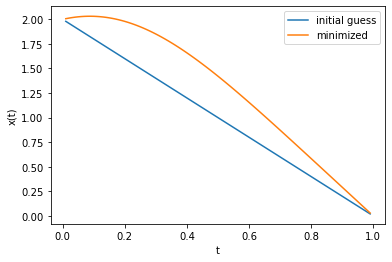

In [58]:
import numpy as np
import matplotlib.pyplot as plt
def params():
    nvar = 99; m = 1. # We have 99 middle points, 1,2,...,99
    xini, xfin = 2., 0. # end points are fixed at 2 and 0
    tt = 1.; dt = tt/(nvar+1) # total time 1
    return nvar, m, xini, xfin, dt

def fod(der,x):
    return -x**3 if der==0 else -3*x**2

def gradient(xs):
    nvar, m, xini, xfin, dt = params()
    arr = np.zeros(nvar)
    arr[0] = (m/dt)*(2*xs[0]-xini-xs[1]) + dt * fod(0,xs[0])
    arr[1:-1] = (m/dt)*(2*xs[1:-1] - xs[:-2] - xs[2:]) + dt*fod(0,xs[1:-1])
    arr[-1] = (m/dt)*(2*xs[-1]-xs[-2]-xfin) +dt * fod(0,xs[-1])
    return arr

def hessian(xs):
    nvar, m, xini, xfin, dt = params()
    he = np.diag(2*m/dt+ dt*fod(1,xs))
    np.fill_diagonal(he[1:,:], -m/dt)   
    np.fill_diagonal(he[:,1:], -m/dt)
    return he

def multi_newton(gradient,hessian,xolds,kmax=200,tol=1.e-8):
    for k in range(1,kmax):
        grad_xolds = gradient(xolds)
        he_xolds = hessian(xolds)
        xnews = xolds + gauelim_pivot(he_xolds, -grad_xolds)
        err = termcrit(xolds,xnews)
        print(k, xnews, err)
        if err < tol:
            break
        xolds = np.copy(xnews)
    else:
        xnews = None
    return xnews


def gauelim_pivot(inA,inbs):
    A = np.copy(inA)
    bs = np.copy(inbs)
    n = bs.size

    for j in range(n-1):
        k = np.argmax(np.abs(A[j:,j])) + j
        if k != j:
            A[j,:], A[k,:] = A[k,:], A[j,:].copy()
            bs[j], bs[k] = bs[k], bs[j]

        for i in range(j+1,n):
            coeff = A[i,j]/A[j,j]
            A[i,j:] -= coeff*A[j,j:]
            bs[i] -= coeff*bs[j]

    xs = backsub(A,bs)
    return xs

def backsub(U,bs):
    n = bs.size
    xs = np.zeros(n)
    for i in reversed(range(n)):
        xs[i] = (bs[i] - U[i,i+1:]@xs[i+1:])/U[i,i]
    return xs

def termcrit(xolds,xnews):
    errs = np.abs((xnews - xolds)/xnews)
    return np.sum(errs)


if __name__ == '__main__':
    nvar, m, xini, xfin, dt = params()
    xolds = np.linspace(2,0,nvar+2)[1:-1]
    xnews = multi_newton(gradient, hessian, xolds); print(xnews)
    tlist = np.linspace(0,1,nvar+2)
    plt.plot(tlist[1:-1],xolds,label='initial guess')
    plt.plot(tlist[1:-1],xnews, label='minimized')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('x(t)')


# Homework
Modify the above code for minimizing the action to address the physical context of the _harmonic oscillator_, namely 
$$
V(x) = \frac{1}{2}x^2
$$
Take $m=1$, $x_0 = 0$, $x_{n−1} = 1$ and $T = 1$. 
Plot the coordinate $x(t)$ of the particle as a function of time;
also show the (analytically known) answer.